# MULTIGRIS ISM applications
## <font color=red>PRELIMINARY</font> Use the hierarchical method (BOND context)

<font color=red>For best performance, it is advised to execute MULTIGRIS in the shell, as explained in the README. This notebook is just a way to illustrate a workflow. </font>

***
This notebook presents some examples of ISM applications with MULTIGRIS. <font color=red>Make sure to check the general notebooks on how to run the programs beforehand!</font>

We'll also take the occasion to use various plots and inference options. 

The applications will use the following Cloudy grid (Ferland et al. [2017](https://ui.adsabs.harvard.edu/abs/2017RMxAA..53..385F/abstract)):
- BOND

The various notebooks use some specific terms described in the file TERMS.org. 
***

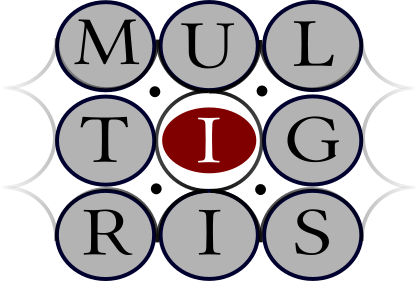

In [1]:
%load_ext autoreload
%autoreload 2
from wand.image import Image as WImage #this is to view PDFs
from IPython.display import Image
Image(filename='../Images/logo.png')

## Table of contents:
* [Hierarchical with no hyperparameters or parameter correlations](#app1)
* [Introducing correlations](#app2)

## Imports and settings
***

In [2]:
import os

import sys
sys.path.append('../') 

#arviz to read the PyMC3 trace
import arviz as az

import numpy as np
import matplotlib.pyplot as plt

#imports to make input files
import importlib
import Library.lib_input
importlib.reload(Library.lib_input)
from Library.lib_input import *

#import the main MULTIGRIS scripts
import mgris_search, mgris_process, mgris_post_process, mgris_compare

#may need to run this if the script is interrupted
from Library.lib_main import closelogfiles

#to read the grid
import pandas as pd

#this is the input filename we'll use throughout, it will be automatically copied in the output directories each run
os.makedirs('./Runs/ISM_applications', exist_ok=True)
inputfile = './Runs/ISM_applications/input_hierarchical.txt' 

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Checking path in case several copies exist

In [3]:
mgris_search.__file__

'/local/home/vleboute/work/MULTIGRIS/mgris/mgris_search.py'

## Simultaneous inference test <a class="anchor" id="app1"></a>
***

Here we illustrate how to perform the inference of several observation blocks simultaneously, which is done simply by using the "hierarchical" input parameter. This will be the basis for introducing hyperparameters and correlations later on. 

In [4]:
params = get_params()
params['context'].value = 'Contexts/mgris_bond/'
output_directory = './Runs/ISM_applications/hierarchical/'

params['output'].value = output_directory

params['BEGIN configuration'].value = '''select geom [0.03,0.03]
select NO [-1,-1]
'''

For simplicity and rapidity we will use only two objects

In [5]:
params['observation_sets'] = [InputParameter('BEGIN observations'),
                              InputParameter('BEGIN observations', description=''), ]

We now define each observation set. We can keep the names by default but we can also customize it, as long as the name ends with SET1, SET2...

In [6]:
labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [49.33, 42.18, 45.56, 100, 188.9, 573.1, 2.13, 277.6, 8.21]
errors = [1.67, 1.38, 1.58, 2.99, 5.55, 17.05, 0.2, 8.82, 0.3612]

params['observation_sets'][0].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][0].value += '{} {} {}\n'.format(l, values[i], errors[i])
params['observation_sets'][0].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1154_SET1'}

labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [28.66, 48.92, 47.9, 100, 278.4, 826.8, 1.73, 281.1, 4.75]
errors = [0.94, 1.58, 1.49, 2.89, 8.02, 23.83, 0.14, 8.77, 0.1414]

params['observation_sets'][1].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][1].value += '{} {} {}\n'.format(l, values[i], errors[i])
params['observation_sets'][1].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1011_SET2'}

params['use_scaling'].value = "'all'"

params['hierarchical'].value = "True"
params['hierarchical'].commented = False

make_input(params, inputfile)

In [7]:
inputfile

'./Runs/ISM_applications/input_hierarchical.txt'

In [8]:
closelogfiles() #in case run was interrupted
mgris_search.main(args=mgris_search.args(inputfile=inputfile, nsamples_per_job=3000))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍           ┑
     ┝ INFERENCE ┥
     ┕           ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







    ┍========================================┑
    ┝========= MULTIGRIS summary ============┥
    ┝========================================┙
    ┝ git version & date:
    ┝ - 296e0b8 (2023-11-02 15:44:53 +0100)
    ┝ - 296e0b8
    ┝ git submodules:
    ┝ -  
    ┝========================================┥
    ┝ PyMC version: 
    ┝ - 4.4.0
    ┝ Tensor library:
    ┝ - aesara
    ┝   - Compile directory:
    ┝     - /tmp/aesara.NOBACKUP
    ┝   - Precision:
    ┝     - float32
    ┕========================================┙
    







▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INPUT PARAMETERS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓



    ┍========================================┑
    ┝===========

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
✨
✨✨
✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨ END
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨
✨✨
✨
Inference ended     : 2023-11-06 21:23:

In [9]:
closelogfiles() #in case run was interrupted
mgris_process.main(args=mgris_process.args(inputfile=inputfile))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍            ┑
     ┝ PROCESSING ┥
     ┕            ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 06/11/2023 21:23:38
    ┕========================================┙
   

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INFERENCE DATA ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓



    Run summary
    - input file         : ./Runs/ISM_applications/input_hierarchical.txt
    - output directory   : ./Runs/ISM_applications/hierarchical/
    
List of tracers whose detection level deviates from the mean detection level (values=nsigma/mean(nsigma); ideally most values should be around 1, or global sdev as low as possible):
 - NE_3_386876A{J1154SET1}

In [10]:
%cat $output_directory/results.txt

                mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
scale[0]      -1.391  0.011  -1.409   -1.372      0.000    0.000    3777.0    3494.0   1.01
scale[1]      -1.205  0.009  -1.220   -1.188      0.000    0.000    3898.0    3972.0   1.00
idx_U_0        8.998  0.270   8.524    9.431      0.004    0.003    3456.0    3571.0   1.00
idx_age_0      2.951  0.433   2.554    3.497      0.007    0.005    3847.0    3720.0   1.00
idx_hbfrac_0   8.721  0.137   8.500    8.900      0.012    0.009      90.0     140.0   1.04
idx_Zsun_0     7.007  0.261   6.555    7.457      0.004    0.003    3796.0    3669.0   1.00
idx_U_1       11.023  0.261  10.545   11.447      0.004    0.003    3969.0    3888.0   1.00
idx_age_1      1.174  1.286   0.001    3.298      0.021    0.015    3995.0    3986.0   1.01
idx_hbfrac_1   8.764  0.127   8.533    8.966      0.002    0.001    3794.0    3755.0   1.01
idx_Zsun_1     6.996  0.263   6.542    7.447      0.004    0.003    3890.0    38

## Introducing correlations <a class="anchor" id="app2"></a>
***

Hierarchical bayesian methods start becoming eally powerful when we introduce hyperparameters for the sample, or correlation between parameters of different sets.

In [11]:
params = get_params()
params['context'].value = 'Contexts/mgris_loc/Single'
output_directory = './Runs/ISM_applications/hierarchical/'

params['output'].value = output_directory

We can introduce several new random variables that will be used for priors

In [12]:
params['pmextra'].value = "pm.TruncatedNormal('coeff1', mu=-0.2, sigma=0.5, lower=-2, upper=0), pm.TruncatedNormal('coeff2', mu=0, sigma=0.5, lower=-2, upper=0)"

Now we can use these new parameters with literal priors:

In [13]:
params['BEGIN configuration'].value = '''select geom [0.03,0.03]
select NO [-1,-1]
U_1 == model['coeff1'] + U_0
age_1 == model['coeff2'] + U_0
'''

In [14]:
params['observation_sets'] = [InputParameter('BEGIN observations'),
                              InputParameter('BEGIN observations', description=''), ]

In [15]:
labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [49.33, 42.18, 45.56, 100, 188.9, 573.1, 2.13, 277.6, 8.21]
errors = [1.67, 1.38, 1.58, 2.99, 5.55, 17.05, 0.2, 8.82, 0.3612]

params['observation_sets'][0].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][0].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][0].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1154_SET1'}

labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [28.66, 48.92, 47.9, 100, 278.4, 826.8, 1.73, 281.1, 4.75]
errors = [0.94, 1.58, 1.49, 2.89, 8.02, 23.83, 0.14, 8.77, 0.1414]

params['observation_sets'][1].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][1].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][1].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1011_SET2'}

params['use_scaling'].value = "'all'"

params['hierarchical'].value = "True"
params['hierarchical'].commented = False

make_input(params, inputfile)

## Introducing hyperparameters <a class="anchor" id="app3"></a>
***

In [3]:
params = get_params()
params['context'].value = 'Contexts/mgris_loc/Single'
output_directory = './Runs/ISM_applications/hierarchical/'

params['output'].value = output_directory

NameError: name 'get_params' is not defined

In [4]:
params['pmextra'].value = "pm.TruncatedNormal('mu_Zsun', mu=-0.2, sigma=0.5, lower=-2, upper=0)"

NameError: name 'params' is not defined

In [ ]:
params['BEGIN configuration'].value = '''select geom [0.03,0.03]
select NO [-1,-1]
Zsun (*) = mu_Zsun 0.5
'''

In [ ]:
params['observation_sets'] = [InputParameter('BEGIN observations'),
                              InputParameter('BEGIN observations', description=''), ]

In [ ]:
labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [49.33, 42.18, 45.56, 100, 188.9, 573.1, 2.13, 277.6, 8.21]
errors = [1.67, 1.38, 1.58, 2.99, 5.55, 17.05, 0.2, 8.82, 0.3612]

params['observation_sets'][0].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][0].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][0].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1154_SET1'}

labels = ['BLND_372700A', 
          'NE_3_386876A', 
          'H__1_434046A', 
          'H__1_486133A', 
          'O__3_495891A', 
          'O__3_500684A',
          'O__1_630030A',
          'H__1_656281A',
          'S26716+30A']

values = [28.66, 48.92, 47.9, 100, 278.4, 826.8, 1.73, 281.1, 4.75]
errors = [0.94, 1.58, 1.49, 2.89, 8.02, 23.83, 0.14, 8.77, 0.1414]

params['observation_sets'][1].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][1].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][1].extras = {'delta_add': 0.05, 'scale': 'linear', 'name': 'J1011_SET2'}

params['use_scaling'].value = "'all'"

params['hierarchical'].value = "True"
params['hierarchical'].commented = False

make_input(params, inputfile)